In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load the dataset***

In [18]:
df=pd.read_csv('/content/stress_detection.csv')

In [19]:
df.head()

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [20]:
#to see all column
pd.set_option('display.max_columns',None)

In [21]:
df.head()

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [22]:
#shape of dfset
df.shape

(3000, 20)

In [23]:
#check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   participant_id     3000 non-null   int64  
 1   day                3000 non-null   int64  
 2   PSS_score          3000 non-null   int64  
 3   Openness           3000 non-null   float64
 4   Conscientiousness  3000 non-null   float64
 5   Extraversion       3000 non-null   float64
 6   Agreeableness      3000 non-null   float64
 7   Neuroticism        3000 non-null   float64
 8   sleep_time         3000 non-null   float64
 9   wake_time          3000 non-null   float64
 10  sleep_duration     3000 non-null   float64
 11  PSQI_score         3000 non-null   int64  
 12  call_duration      3000 non-null   float64
 13  num_calls          3000 non-null   int64  
 14  num_sms            3000 non-null   int64  
 15  screen_on_time     3000 non-null   float64
 16  skin_conductance   3000 

In [24]:
#check the null values
df.isnull().sum()

,0
participant_id,0
day,0
PSS_score,0
Openness,0
Conscientiousness,0
Extraversion,0
Agreeableness,0
Neuroticism,0
sleep_time,0
wake_time,0


In [25]:
#check the duplicated rows
df.duplicated().sum()

0

In [26]:
#drop the unnessary column participat_id and day column
df.drop(['day','participant_id'],axis=1,inplace=True)

#Feature Selection:-

In [27]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define predictors and target
X = df.drop(columns=['PSS_score'])  # Drop target and identifiers
y = df['PSS_score']

# Train a Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
print(importance)

# Keep only the top 10 features
top_features = importance['Feature'][:10]
reduced_data = df[top_features]


              Feature  Importance
13   skin_conductance    0.067537
12     screen_on_time    0.065931
5          sleep_time    0.065786
14      accelerometer    0.065356
7      sleep_duration    0.065346
9       call_duration    0.065061
2        Extraversion    0.064327
3       Agreeableness    0.064162
16  mobility_distance    0.063289
4         Neuroticism    0.061791
6           wake_time    0.061757
1   Conscientiousness    0.061536
0            Openness    0.059673
15    mobility_radius    0.059339
11            num_sms    0.051139
10          num_calls    0.041017
8          PSQI_score    0.016951


In [28]:
#drop the least correalted to pss_scored
df=df.drop(['PSQI_score','num_calls','num_sms'],axis=1)

In [29]:
df.columns

Index(['PSS_score', 'Openness', 'Conscientiousness', 'Extraversion',
       'Agreeableness', 'Neuroticism', 'sleep_time', 'wake_time',
       'sleep_duration', 'call_duration', 'screen_on_time', 'skin_conductance',
       'accelerometer', 'mobility_radius', 'mobility_distance'],
      dtype='object')

Correlation with target column then eliminate column

In [31]:
# Compute correlation with PSS_score
correlation = df.corr()["PSS_score"].sort_values(ascending=False)

# Print correlation
correlation

,PSS_score
PSS_score,1.000000
skin_conductance,0.016004
Neuroticism,0.015813
Conscientiousness,0.011215
Extraversion,0.010655
mobility_radius,0.008731
Openness,0.007923
call_duration,0.006049
accelerometer,0.004656
screen_on_time,0.004377


In [32]:
#drop the some column according to correlation
df.drop(['screen_on_time','accelerometer','call_duration','mobility_distance'],axis=1,inplace=True)

In [33]:
df.columns

Index(['PSS_score', 'Openness', 'Conscientiousness', 'Extraversion',
       'Agreeableness', 'Neuroticism', 'sleep_time', 'wake_time',
       'sleep_duration', 'skin_conductance', 'mobility_radius'],
      dtype='object')

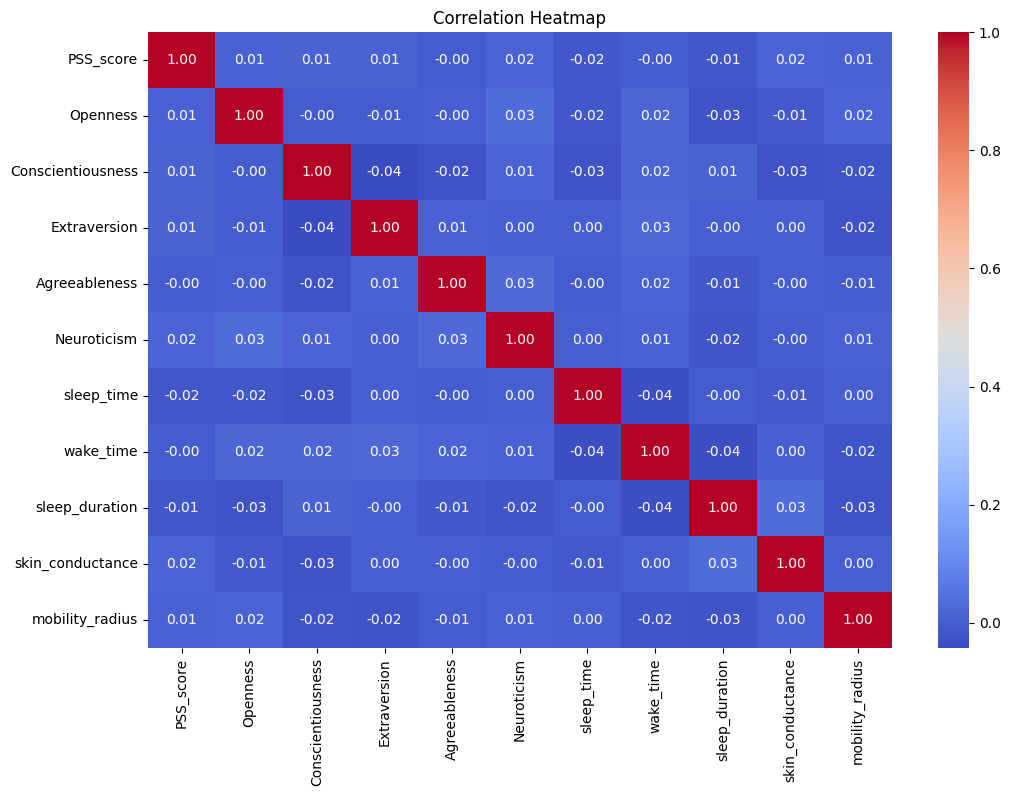

In [36]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

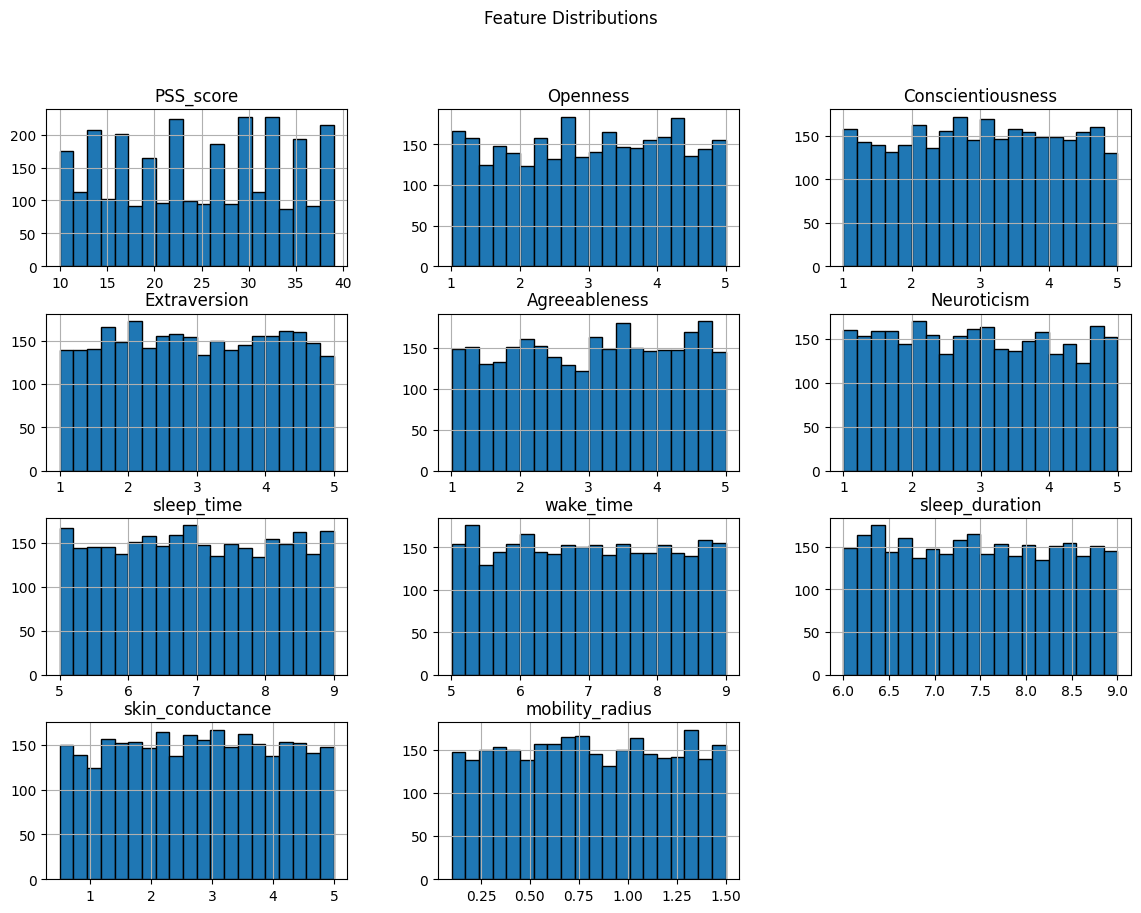

In [37]:
#  Feature Distribution
df.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

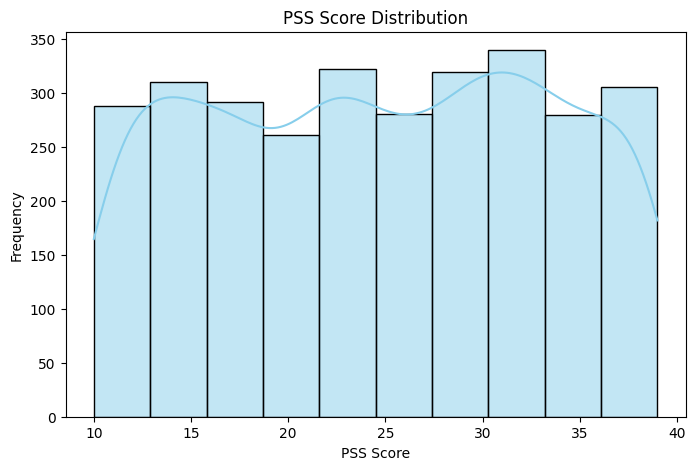

In [38]:
# Target Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df["PSS_score"], kde=True, bins=10, color='skyblue')
plt.title("PSS Score Distribution")
plt.xlabel("PSS Score")
plt.ylabel("Frequency")
plt.show()

#Spliting the dataset X,y

In [43]:
X=df.drop('PSS_score',axis=1)
y=df['PSS_score']

#Spliting the dataset in to train and test

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Training model

In [49]:
model=LinearRegression()

In [50]:
model.fit(X_train, y_train)  # Train the model
y_pred = model.predict(X_test)

In [ ]:
model.fit(X_train, y_train)  # Train the model
y_pred = model.predict(X_test)

In [51]:
# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f" R²: {r2:.4f}, MSE: {mse:.4f}")

 R²: -0.0057, MSE: 70.9197


#Save the model:-

In [52]:
# Save the best model
model_filename = "best_model.pkl"
joblib.dump(model, model_filename)
print(f"Best model saved as {model_filename}.")

Best model saved as best_model.pkl.


In [53]:
df.columns

Index(['PSS_score', 'Openness', 'Conscientiousness', 'Extraversion',
       'Agreeableness', 'Neuroticism', 'sleep_time', 'wake_time',
       'sleep_duration', 'skin_conductance', 'mobility_radius'],
      dtype='object')

#Random input to use model to predict stress level

In [64]:
# random input data (adjust ranges as per realistic values for your dataset)
random_input = {
    "Openness": np.random.uniform(1, 5),
    "Conscientiousness": np.random.uniform(1, 5),
    "Extraversion": np.random.uniform(1, 5),
    "Agreeableness": np.random.uniform(1, 5),
    "Neuroticism": np.random.uniform(1, 5),
    "sleep_time": np.random.uniform(6, 9),
    "wake_time": np.random.uniform(5, 8),
    "sleep_duration": np.random.uniform(6, 9),
    "skin_conductance": np.random.uniform(0.5, 5),
    "mobility_radius": np.random.uniform(0.1, 2)
}


In [67]:
# Convert to DataFrame
random_input_df = pd.DataFrame([random_input])

In [68]:
print(f"Random Input:\n{random_input_df}")

Random Input:
   Openness  Conscientiousness  Extraversion  Agreeableness  Neuroticism  \
0  3.541269           2.720262       2.80821       4.451504     2.833595   

   sleep_time  wake_time  sleep_duration  skin_conductance  mobility_radius  
0    7.542057   5.978536        6.539426          3.186535         0.316255  


In [69]:
# Load the best model
best_model = joblib.load("best_model.pkl")

# Predict the target (PSS_score)
predicted_pss_score = best_model.predict(random_input_df)
print(f"Predicted PSS Score: {predicted_pss_score[0]:.2f}")

Predicted PSS Score: 24.87
